In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv('newV3.csv')

# Features to use for clustering
features = ['danceability', 'tempo'] 
# features = ['danceability', 'energy', 'valence', 'tempo','acousticness',
            # 'instrumentalness', 'liveness', 'loudness','speechiness','track_popularity']  # Adjust based on your features
# features = ['danceability', 'energy', 'valence', 'tempo']  # Adjust based on your features
X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
n_clusters = 10  # Number of clusters, adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Manually inspect clusters and assign mood labels
cluster_moods = {
    0: 'Happy',
    1: 'Excited',
    2: 'Relaxed',
    3: 'Calm',
    4: 'Neutral',
    5: 'Thoughtful',
    6: 'Melancholic',
    7: 'Worried',
    8: 'Upset',
    9: 'Sad',



    # Map each cluster to a mood based on inspection
}

# Add mood field to the dataset
df['mood'] = df['cluster'].map(cluster_moods)

# Save the updated dataset with mood labels
df.to_csv('songs_with_moods.csv', index=False)

print("Dataset updated with mood labels successfully.")


Dataset updated with mood labels successfully.


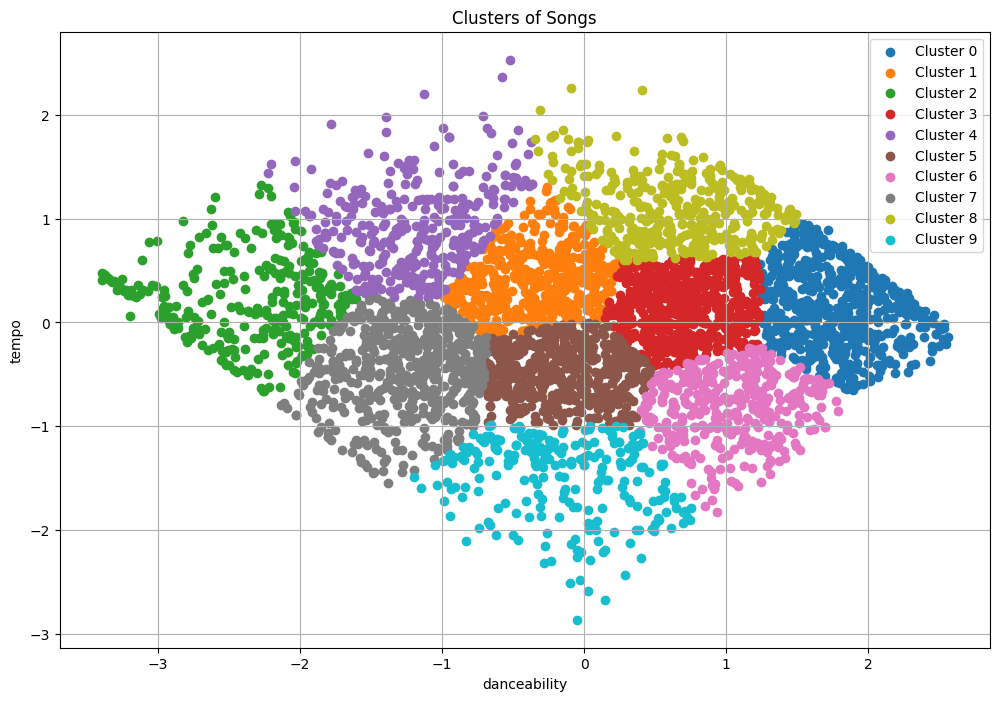

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset
df = pd.read_csv('newV3.csv')

# Features to use for clustering
features = ['valence', 'energy'] 
# features = ['danceability', 'energy', 'valence', 'tempo','track_popularity']  # Adjust based on your features
# features = ['danceability', 'energy', 'valence', 'tempo','acousticness',
            #  'instrumentalness', 'liveness', 'loudness','speechiness','track_popularity'] 
X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
n_clusters = 10  # Number of clusters, adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Reduce dimensionality for visualization (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(12, 8))
for cluster in range(n_clusters):
    cluster_data = X_pca[df['cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.xlabel('danceability')
plt.ylabel('tempo')
plt.title('Clusters of Songs')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('processedDataset.csv')

# Assuming the cluster labels are stored in a column 'cluster_id'
# Filter the dataset for songs in the zeroth cluster
cluster_0_songs = df[df['cluster'] == 8]

# Display the first 10 song titles from the zeroth cluster
zero_cluster_titles = cluster_0_songs['title'].head(30)

print(zero_cluster_titles)


0                 Mathakayan obe
4                   Kavi Seepada
10               Athugala wehera
12                  Nuwara Eliye
13        Kiriweherata Yana Pare
16          Udawediya Malak Wela
20                  Lengathukama
21                Gatabaru Kande
22                  Thanamalvila
23                      Ammalage
25      Jeewithaye hodama hariya
26     Maharagamata Wahinnathiwa
28                    Rosa Pethi
33                    Kusum Sara
34                      Nugegoda
35                   Dandun Pasu
57                        Manali
92                   Nohithunata
100                   Maga Haree
130                Asurin Midela
154                Sansaraye Maa
169                     Roo Sara
188                     Numba Ha
209           Pipunada Dura Atha
216         Borukari (Pung Pung)
217           Dangakara Hedakari
218                    Hithumate
238              Dampata Handave
244             Meeduma Uthurana
245                        Landu
Name: titl

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load your data
data = pd.read_csv('songs_with_moods.csv')

# Preprocess the data
# Encode mood
mood_encoder = LabelEncoder()
data['mood_encoded'] = mood_encoder.fit_transform(data['mood'])

# Select features
features = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness', 'liveness', 'loudness', 'speechiness']
X = data[features]
y = data['mood_encoded']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Example function to predict songs based on mood
def recommend_songs(mood_input, model, mood_encoder, scaler, data):
    mood_encoded = mood_encoder.transform([mood_input])
    mood_data = pd.DataFrame({
        'danceability': [0], 'energy': [0], 'valence': [0], 'tempo': [0], 'acousticness': [0],
        'instrumentalness': [0], 'liveness': [0], 'loudness': [0], 'speechiness': [0]
    })  # Placeholder for actual feature values
    mood_scaled = scaler.transform(mood_data)
    
    # Predict mood
    predicted_mood = model.predict(mood_scaled)
    
    # Retrieve top songs
    recommended_songs = data[data['mood_encoded'] == predicted_mood[0]]
    return recommended_songs[['track_id', 'title', 'artists', 'album']]

# Example usage
mood_input = 'Calm'
top_songs = recommend_songs(mood_input, knn, mood_encoder, scaler, data)
print(top_songs)


Accuracy: 0.61
                    track_id                             title  \
11    4aeYSaRqJCwglBcdJq616X                        Marambaree   
38    1cGYMuoWc0JPiJufqqI23d  Sililara Sitha Nayana - Acoustic   
40    6SyHy2WLPX56Y8X9ywseLZ         Sanasennam Ma - Unplugged   
63    690V4j1eiTPyhWeWvuhv2H                             Ru Ra   
71    4iUlmWXTES2dybcvkH9eHe                         Ma Dutuwa   
...                      ...                               ...   
1414  5uCax9HTNlzGybIStD3vDh              Say You Won't Let Go   
1419  3OEuQs9pvB2sPmotZKhDjJ                  Hanthana Sulange   
1426  3HKCFwQmnSGdvnXAbO9oyO            Ma Oba Hamuwana Dinaye   
1441  2CW8W9lPkjEjLbgjtZiNrs                         Hada Para   
1442  2BZaLHfH0272K3eHbe8y3P                      Sandawathiye   

                                             artists  \
11               Rohana Weerasinghe, Edward Jayakody   
38                     Pro Tunes LK, Sajitha Anthony   
40                     P